# IMPORTS

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('wmap.csv')
data['x']

0        2
1        3
2        4
3        5
4        6
      ... 
894    896
895    897
896    898
897    899
898    900
Name: x, Length: 899, dtype: int64

In [47]:
data2=data[0:400]

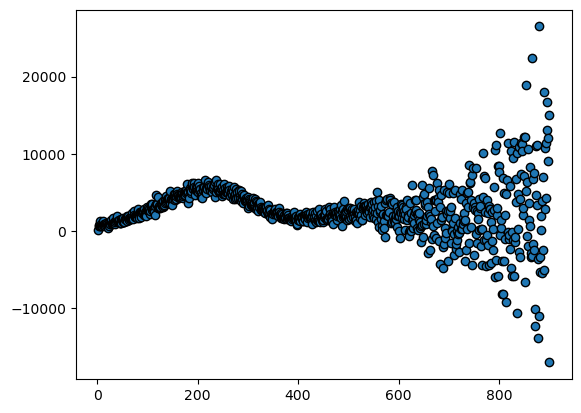

In [6]:
plt.figsize=(20,25)
plots=plt.scatter(data.x,data.y,edgecolors='black')
plt.show(plots)

# Functions

In [146]:

def power_func(x,d,q):
    G=[]
    x=np.array(x)
    j=1
    for i in range(0,(d+1+q)):
        if i<(d+1):
            G.append(x**i)
        else:
            sottr=900//(q+1)*j
            G.append((np.maximum(0,x-sottr))**d)
            j+=1
            
    return G

In [12]:
G_prova=power_func(data['x'],3,10)
G_prova

[81, 162, 243, 324, 405, 486, 567, 648, 729, 810]

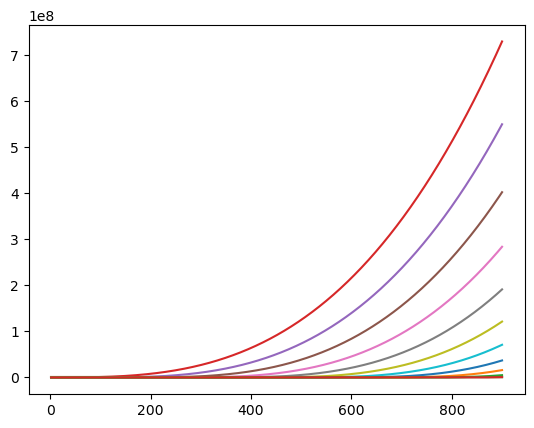

In [10]:
#Plot the loss function
fig=plt.plot(figsize=(25,20))

for i in range(0,14):
    plt.plot(data['x'],G_prova[i])

plt.show()



In [26]:
def pre_processing(x,d,q):
    mat=power_func(x,d,q)
    mat=np.array(mat)
    return np.transpose(mat)

In [61]:
def CV_score (d,q,x=data.x,y=data.y):
    X = pre_processing(x,d,q)
    plm = LinearRegression(fit_intercept=False).fit(X,data.y)
    Y_hat = plm.predict(X)
    MSE_tr = mean_squared_error(y,Y_hat)
    GCV_score=MSE_tr/((1-((d+1)/len(x)))**2)
    return GCV_score

In [130]:
def main(d,q,x=data.x,y=data.y):
    scores=CV_score(d,q,x=data.x,y=data.y)
    return round(scores,2)

# GCV d=3

9 9424840.99


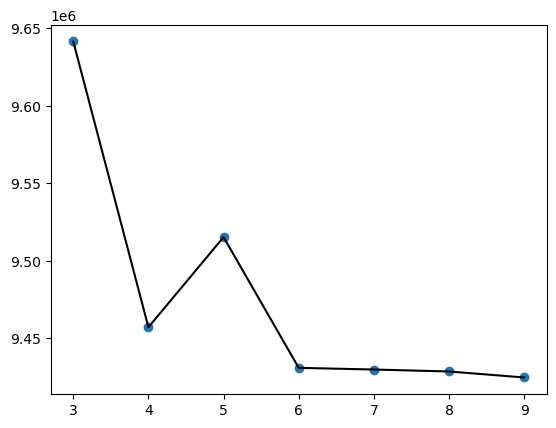

In [147]:
# for d=3 
knots=list(range(3,10))
# print(knots)
res=list(map(main,[3]*len(knots),knots,data.x,data.y))
ind=np.argmin(res)
print(knots[ind],res[ind])
plt.scatter(knots,res)
plt.plot(knots,res,color='black')
plt.show()

# GCV d=1

9 9383559.66


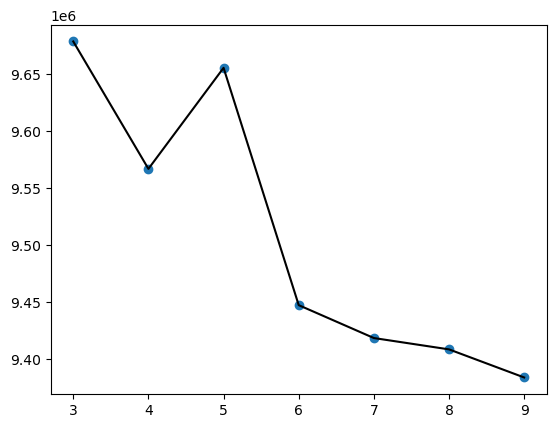

In [132]:
# for d=1 
knots=list(range(3,10))
# print(knots)
res=list(map(main,[1]*len(knots),knots,data.x,data.y))
ind=np.argmin(res)
print(knots[ind],res[ind])
plt.scatter(knots,res)
plt.plot(knots,res,color='black')
plt.show()

# stratified cv

In [153]:
data.loc[0:400,'type']=int(0)
data.loc[400:900,'type']=int(1)
data=data.astype({'type':int})
data

,x,y,type
0,2,123.3820,0
1,3,611.7750,0
2,4,756.6160,0
3,5,1256.7000,0
4,6,696.4790,0
...,...,...,...
894,896,16760.5996,1
895,897,9046.5000,1
896,898,12001.8301,1
897,899,15065.5898,1


In [166]:
d=data.groupby('type').apply(lambda x: x.sample(frac=1))
len(d[d.type==])

499

In [ ]:
def create_fold(k,d=data)

# porcherie

In [120]:
res

[9431040.20990687,
 9429963.322737211,
 9428703.662690373,
 9424840.98978914,
 9425293.419643566,
 9419529.6260003,
 9416440.111626534,
 9409219.00767853,
 9372191.74993919,
 9358780.571908837,
 9391546.018094275,
 9172623.976758143,
 9177032.324434666,
 9107396.912530495,
 9197489.8849481,
 9194337.603202956,
 9100822.424258107,
 9088823.243915683,
 9152235.084983328]

In [75]:
data2=data[400:]

In [142]:
X=pre_processing(data.x,1,23)
print(X)


[[  1   2   0 ...   0   0   0]
 [  1   3   0 ...   0   0   0]
 [  1   4   0 ...   0   0   0]
 ...
 [  1 898 861 ... 121  84  47]
 [  1 899 862 ... 122  85  48]
 [  1 900 863 ... 123  86  49]]


In [143]:
plm=LinearRegression(fit_intercept=False).fit(X,data.y)
c=plm.coef_
c

array([587.40582267,  16.14898569,   2.47919798,  11.55129056,
         2.6296798 ,  -6.23157735, -13.84482249, -24.06607442,
       -18.9129148 ,  -6.03979781,  11.65054877,  19.1704428 ,
         9.9494783 ,   5.04062216,  -4.92853806,   4.74579913,
       -28.07370466,  11.60411546,  24.68910464, -66.30940847,
       102.69949268, -82.27471973,  15.81084476,  93.40474012,
       -86.72909688])

In [144]:
plm = LinearRegression(fit_intercept=False).fit(X,data.y)
Y_hat_ = plm.predict(X)
MSE_tr_ = mean_squared_error(data.y,Y_hat_)
GCV_score_ = MSE_tr_/((1-((3+1)/len(data.x)))**2)
print(MSE_tr_)

9254771.363684587


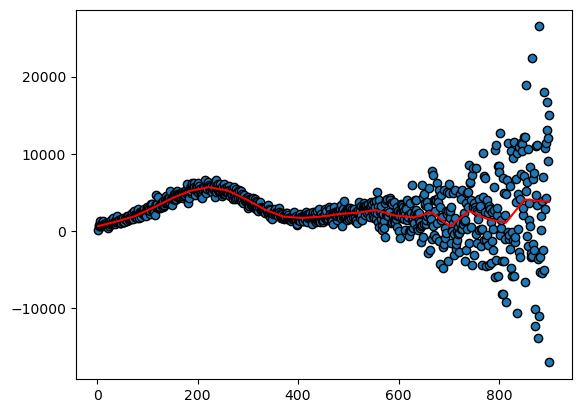

In [145]:
plt.scatter(data.x,data.y,edgecolors='black')
plt.plot(data.x,np.sum((X*c),axis=1),color='red')
plt.show()
# evidenzia i knots

# polyfit

In [133]:
# polynomial test
poly=np.polyfit(data.x,data.y,1)
y_hat=np.polyval(poly,data.x)
mse=mean_squared_error(data.y,y_hat)
mse/((1-4/len(data.x))**2)

10972715.673744118